In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df_pred_results = pd.read_excel("results/pred_test.xlsx")
print(df_pred_results.shape)
df_pred_results.head(2)

(44, 15)


,R,G,B,day_of_year,time_of_day,weather_index,cloud_cover_percent,I_445_pred,I_515_pred,I_630_pred,I_clear_pred,I_445_std,I_515_std,I_630_std,I_clear_std
0,0.105263,0.000,0.000,210,12.200,1,20,767.120000,1497.600000,6526.814545,13157.93,28.347938,43.165727,1305.438330,1442.733297
1,0.453000,0.368,0.462,212,13.533,1,20,15844.208381,25282.135034,15740.750000,57007.38,1185.713774,822.470764,1532.908291,5979.160339


In [23]:
df_true = pd.read_csv("data_split/test_data.csv")
print(df_true.shape)
df_true.head(2)

(44, 11)


,R,G,B,day_of_year,time_of_day,weather_index,cloud_cover_percent,I_445,I_515,I_630,I_clear
0,0.105263,0.000,0.000,210,12.200,1,20,762,1489,4969,12691
1,0.453000,0.368,0.462,212,13.533,1,20,15933,27102,18115,61868


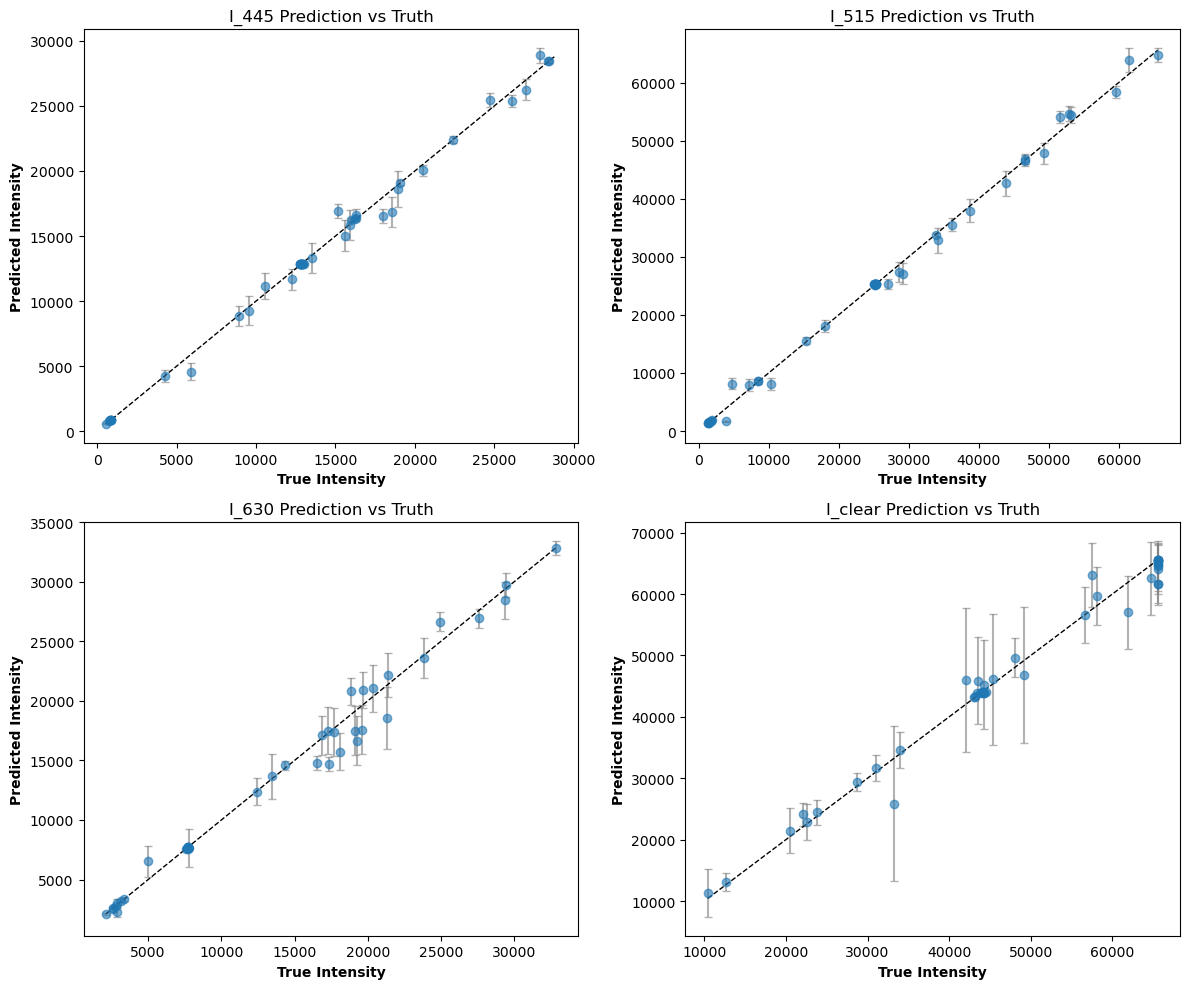

In [24]:
true_cols = ['I_445', 'I_515', 'I_630', 'I_clear']
pred_cols = [f'{c}_pred' for c in true_cols]
std_cols = [f'{c}_std' for c in true_cols]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(true_cols):
    ax = axes[i]
    
    ax.errorbar(
        df_true[col], 
        df_pred_results[pred_cols[i]], 
        yerr=df_pred_results[std_cols[i]], 
        fmt='o', alpha=0.6, ecolor='gray', capsize=3
    )

    min_val = min(df_true[col].min(), df_pred_results[pred_cols[i]].min())
    max_val = max(df_true[col].max(), df_pred_results[pred_cols[i]].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)
    
    ax.set_title(f"{col} Prediction vs Truth")
    ax.set_xlabel("True Intensity", fontweight='bold')
    ax.set_ylabel("Predicted Intensity", fontweight='bold')

plt.tight_layout()
plt.show()